In [1]:
pip install pandas matplotlib seaborn openpyxl


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load CSV file
df = pd.read_csv("bhopal_weapon_license_data.csv")

# Show the first 5 records
df.head()


,license_id,holder_name,father_name,date_of_birth,aadhaar_number,mobile_number,address,area,police_station,gun_type,weapon_model,license_issue_date,license_expiry_date,weapon_status,is_submitted,submission_reason,submission_date,reminder_sent,reminder_date,remarks
0,MPBPL10000,Shanaya Ahluwalia,Nirvi Tara,1968-08-29,5531-XXXX-XXXX,918531993103,"H.No. 427, Kalita Zila, Kamarhati 313760",Kolar,Kolar PS,Revolver,9mm Glock,2023-12-06,2026-12-05,Submitted,False,NaN,NaN,False,NaN,No issue
1,MPBPL10001,Ojas Sachdev,Romil Kanda,1968-03-03,2690-XXXX-XXXX,918014715429,"07/60, Kala Circle, Khammam-553123",Jahangirabad,Jahangirabad PS,Rifle,12mm Desert Eagle,2021-08-08,2024-08-07,Suspended,True,Festival,2024-05-14,True,2025-07-28,Delayed submission
2,MPBPL10002,Farhan Arora,Shlok Ramanathan,1977-09-07,7600-XXXX-XXXX,8215301495,"33/10, Golla Street, Srikakulam 826061",Jahangirabad,Jahangirabad PS,Rifle,12mm Glock,2020-12-13,2023-12-13,Suspended,False,NaN,NaN,True,2025-07-28,Delayed submission
3,MPBPL10003,Ira Talwar,Shlok Rastogi,1995-09-15,5698-XXXX-XXXX,9783209632,"50/578, Barman Path, Madanapalle-189977",Jahangirabad,Jahangirabad PS,Rifle,10mm Glock,2024-03-18,2027-03-18,Suspended,False,NaN,NaN,True,2025-07-28,No issue
4,MPBPL10004,Veer Vig,Baiju Sane,1961-05-08,1710-XXXX-XXXX,3368948076,"H.No. 048, Ganguly Circle, Sasaram-299617",MP Nagar,MP Nagar PS,Pistol,11mm Colt,2020-10-19,2023-10-19,Overdue,True,Riot,2025-02-21,True,2025-07-28,No issue


In [5]:
# Total records
print("Total records:", len(df))

# Count of weapon types
print(df['gun_type'].value_counts())

# Weapon status summary
print(df['weapon_status'].value_counts())

# Submission summary
print(df['is_submitted'].value_counts())


Total records: 200
gun_type
Double Barrel    50
Rifle            45
Revolver         43
Air Gun          32
Pistol           30
Name: count, dtype: int64
weapon_status
Issued       61
Suspended    49
Submitted    45
Overdue      45
Name: count, dtype: int64
is_submitted
True     105
False     95
Name: count, dtype: int64


C:\Users\amaan\AppData\Local\Temp\ipykernel_18420\3436036553.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='weapon_status', palette='Set2')


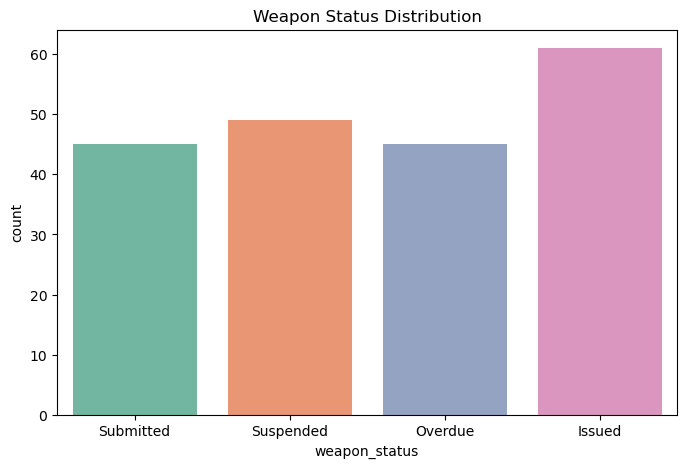

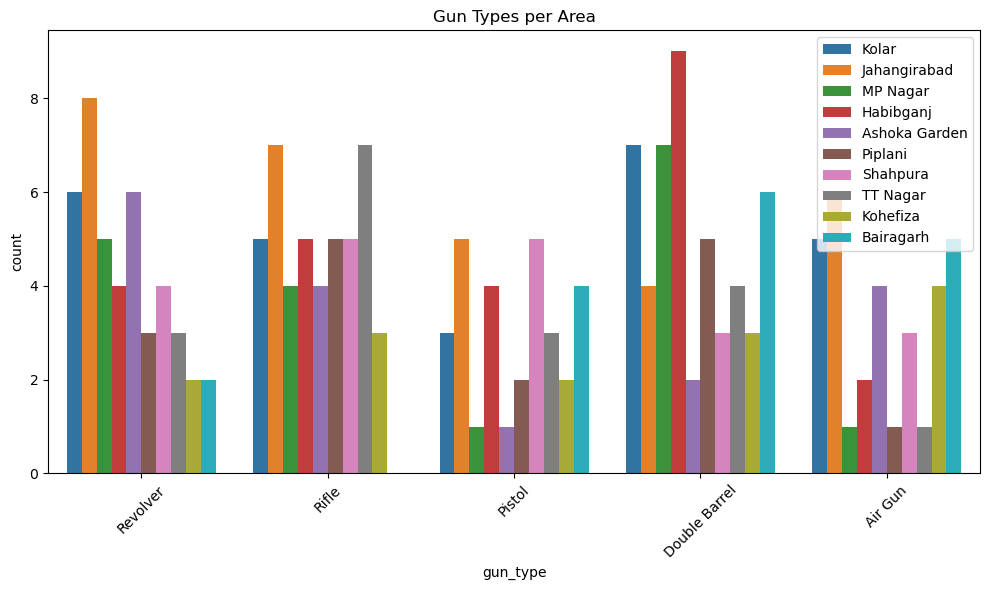

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Weapon status bar chart
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='weapon_status', palette='Set2')
plt.title('Weapon Status Distribution')
plt.show()

# Gun type per area
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gun_type', hue='area')
plt.title('Gun Types per Area')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [9]:
# Weapons not yet submitted
pending = df[df['is_submitted'] == False]

# View top 10
pending[['holder_name', 'mobile_number', 'area', 'gun_type', 'weapon_status']].head(10)


,holder_name,mobile_number,area,gun_type,weapon_status
0,Shanaya Ahluwalia,918531993103,Kolar,Revolver,Submitted
2,Farhan Arora,8215301495,Jahangirabad,Rifle,Suspended
3,Ira Talwar,9783209632,Jahangirabad,Rifle,Suspended
8,Tarini Aurora,126881042,Piplani,Revolver,Issued
9,Krish Bhakta,9528674922,Jahangirabad,Pistol,Suspended
10,Urvi Sekhon,3950987568,Shahpura,Double Barrel,Submitted
11,Ehsaan Bhandari,6102211168,TT Nagar,Rifle,Submitted
13,Tanya Kar,5991270375,Piplani,Rifle,Issued
14,Zain Jain,9567486493,Kolar,Double Barrel,Issued
16,Tanya Bose,913506934497,Ashoka Garden,Double Barrel,Suspended


In [11]:
# Simulate generating reminder messages
pending['reminder_message'] = pending.apply(
    lambda x: f"Dear {x['holder_name']}, please submit your {x['gun_type']} ({x['weapon_model']}) at {x['police_station']} due to upcoming events.", axis=1
)

# View sample message
pending[['holder_name', 'mobile_number', 'reminder_message']].head(5)


C:\Users\amaan\AppData\Local\Temp\ipykernel_18420\4206424300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pending['reminder_message'] = pending.apply(


,holder_name,mobile_number,reminder_message
0,Shanaya Ahluwalia,918531993103,"Dear Shanaya Ahluwalia, please submit your Rev..."
2,Farhan Arora,8215301495,"Dear Farhan Arora, please submit your Rifle (1..."
3,Ira Talwar,9783209632,"Dear Ira Talwar, please submit your Rifle (10m..."
8,Tarini Aurora,126881042,"Dear Tarini Aurora, please submit your Revolve..."
9,Krish Bhakta,9528674922,"Dear Krish Bhakta, please submit your Pistol (..."
